Shor Code ESM

In [96]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, IBMQ
from qiskit.quantum_info import random_statevector, Statevector
from numpy import pi
from qiskit.tools.monitor import job_monitor
#IBMQ.enable_account('9ca92f99294968c8d883deea6f397c27fd7e904601a7fee44f61a0a525f10d25dbbdf6487fc5be871e59002f8f23045845f3693f35f130a1ac6ff8e84630c607')

from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
backend = AerSimulator()
from qiskit.visualization import plot_histogram

In [51]:
# set random vector
random_vector = random_statevector(2)
random_vector.draw('latex')

<IPython.core.display.Latex object>

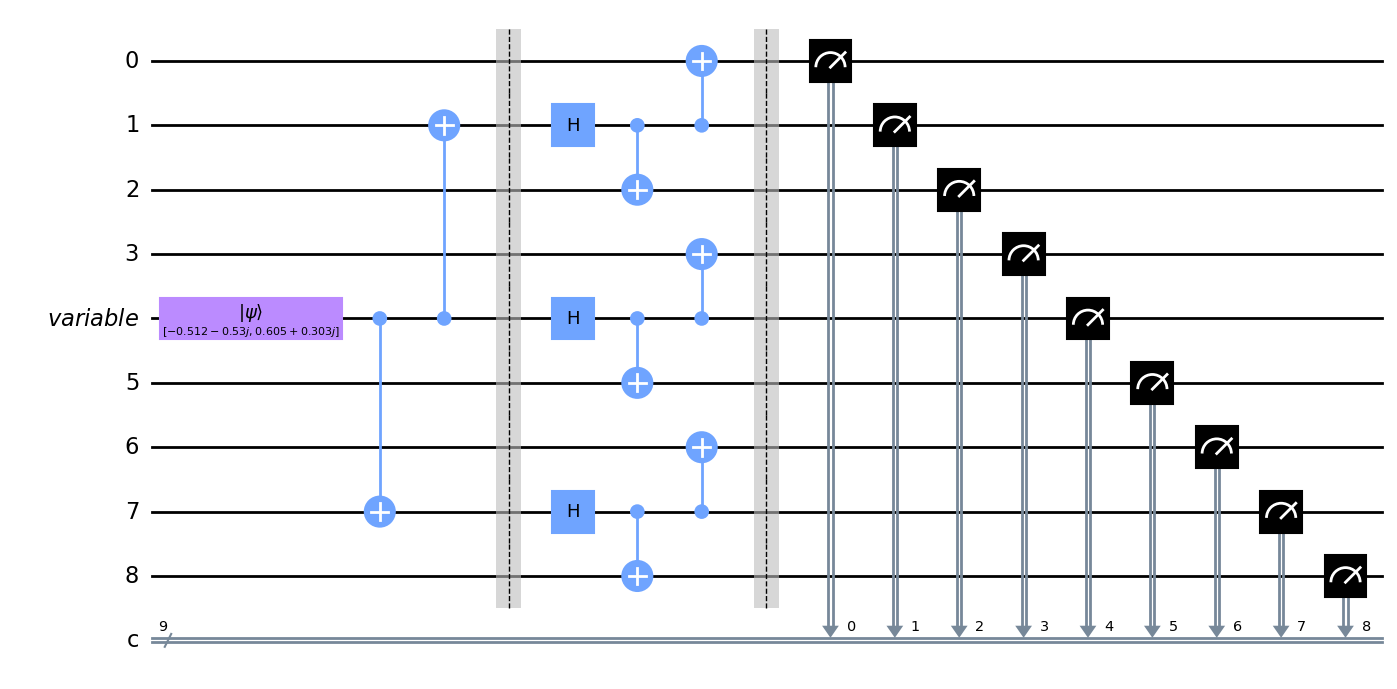

In [59]:
# Tests Hadamard and CNOT gates to see if we have Bell States ?
q_input = QuantumRegister(1, 'variable')
q = QuantumRegister(8, "q_")
test_c = ClassicalRegister(9, 'c')
test_circ = QuantumCircuit(q[:4], q_input, q[4:], test_c)

def test_barrier():
    test_circ.barrier(q[:4],q_input,q[4:])

test_circ.initialize(random_vector,4)

test_circ.cx(q_input[0], q[6])
test_circ.cx(q_input[0], q[1])
test_barrier()
test_circ.h(q[1])
test_circ.h(q_input[0])
test_circ.h(q[6])
test_circ.cx(q[1], q[2])
test_circ.cx(q_input[0], q[4])
test_circ.cx(q[6], q[7])
test_circ.cx(q[1], q[0])
test_circ.cx(q_input[0], q[3])
test_circ.cx(q[6], q[5])
test_barrier()
for i in range(9):
    test_circ.measure(i,test_c[i])


test_circ.draw('mpl')

{'111000111': 7, '000000000': 12, '111111000': 7, '000111111': 6, '000111000': 241, '111000000': 228, '111111111': 273, '000000111': 250}


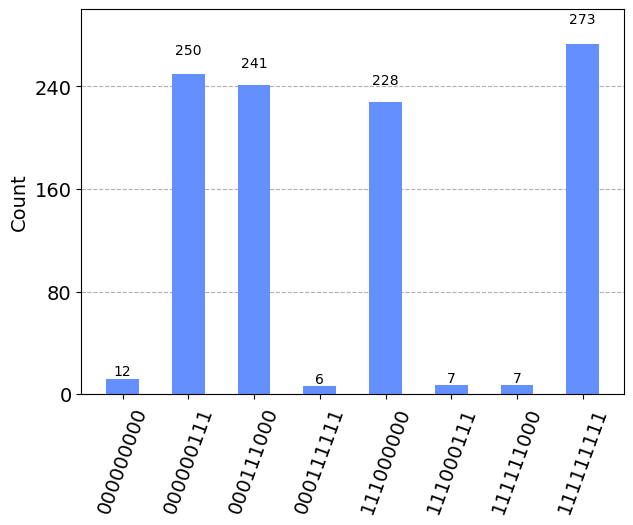

In [102]:
# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(test_circ, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)
plot_histogram(counts)


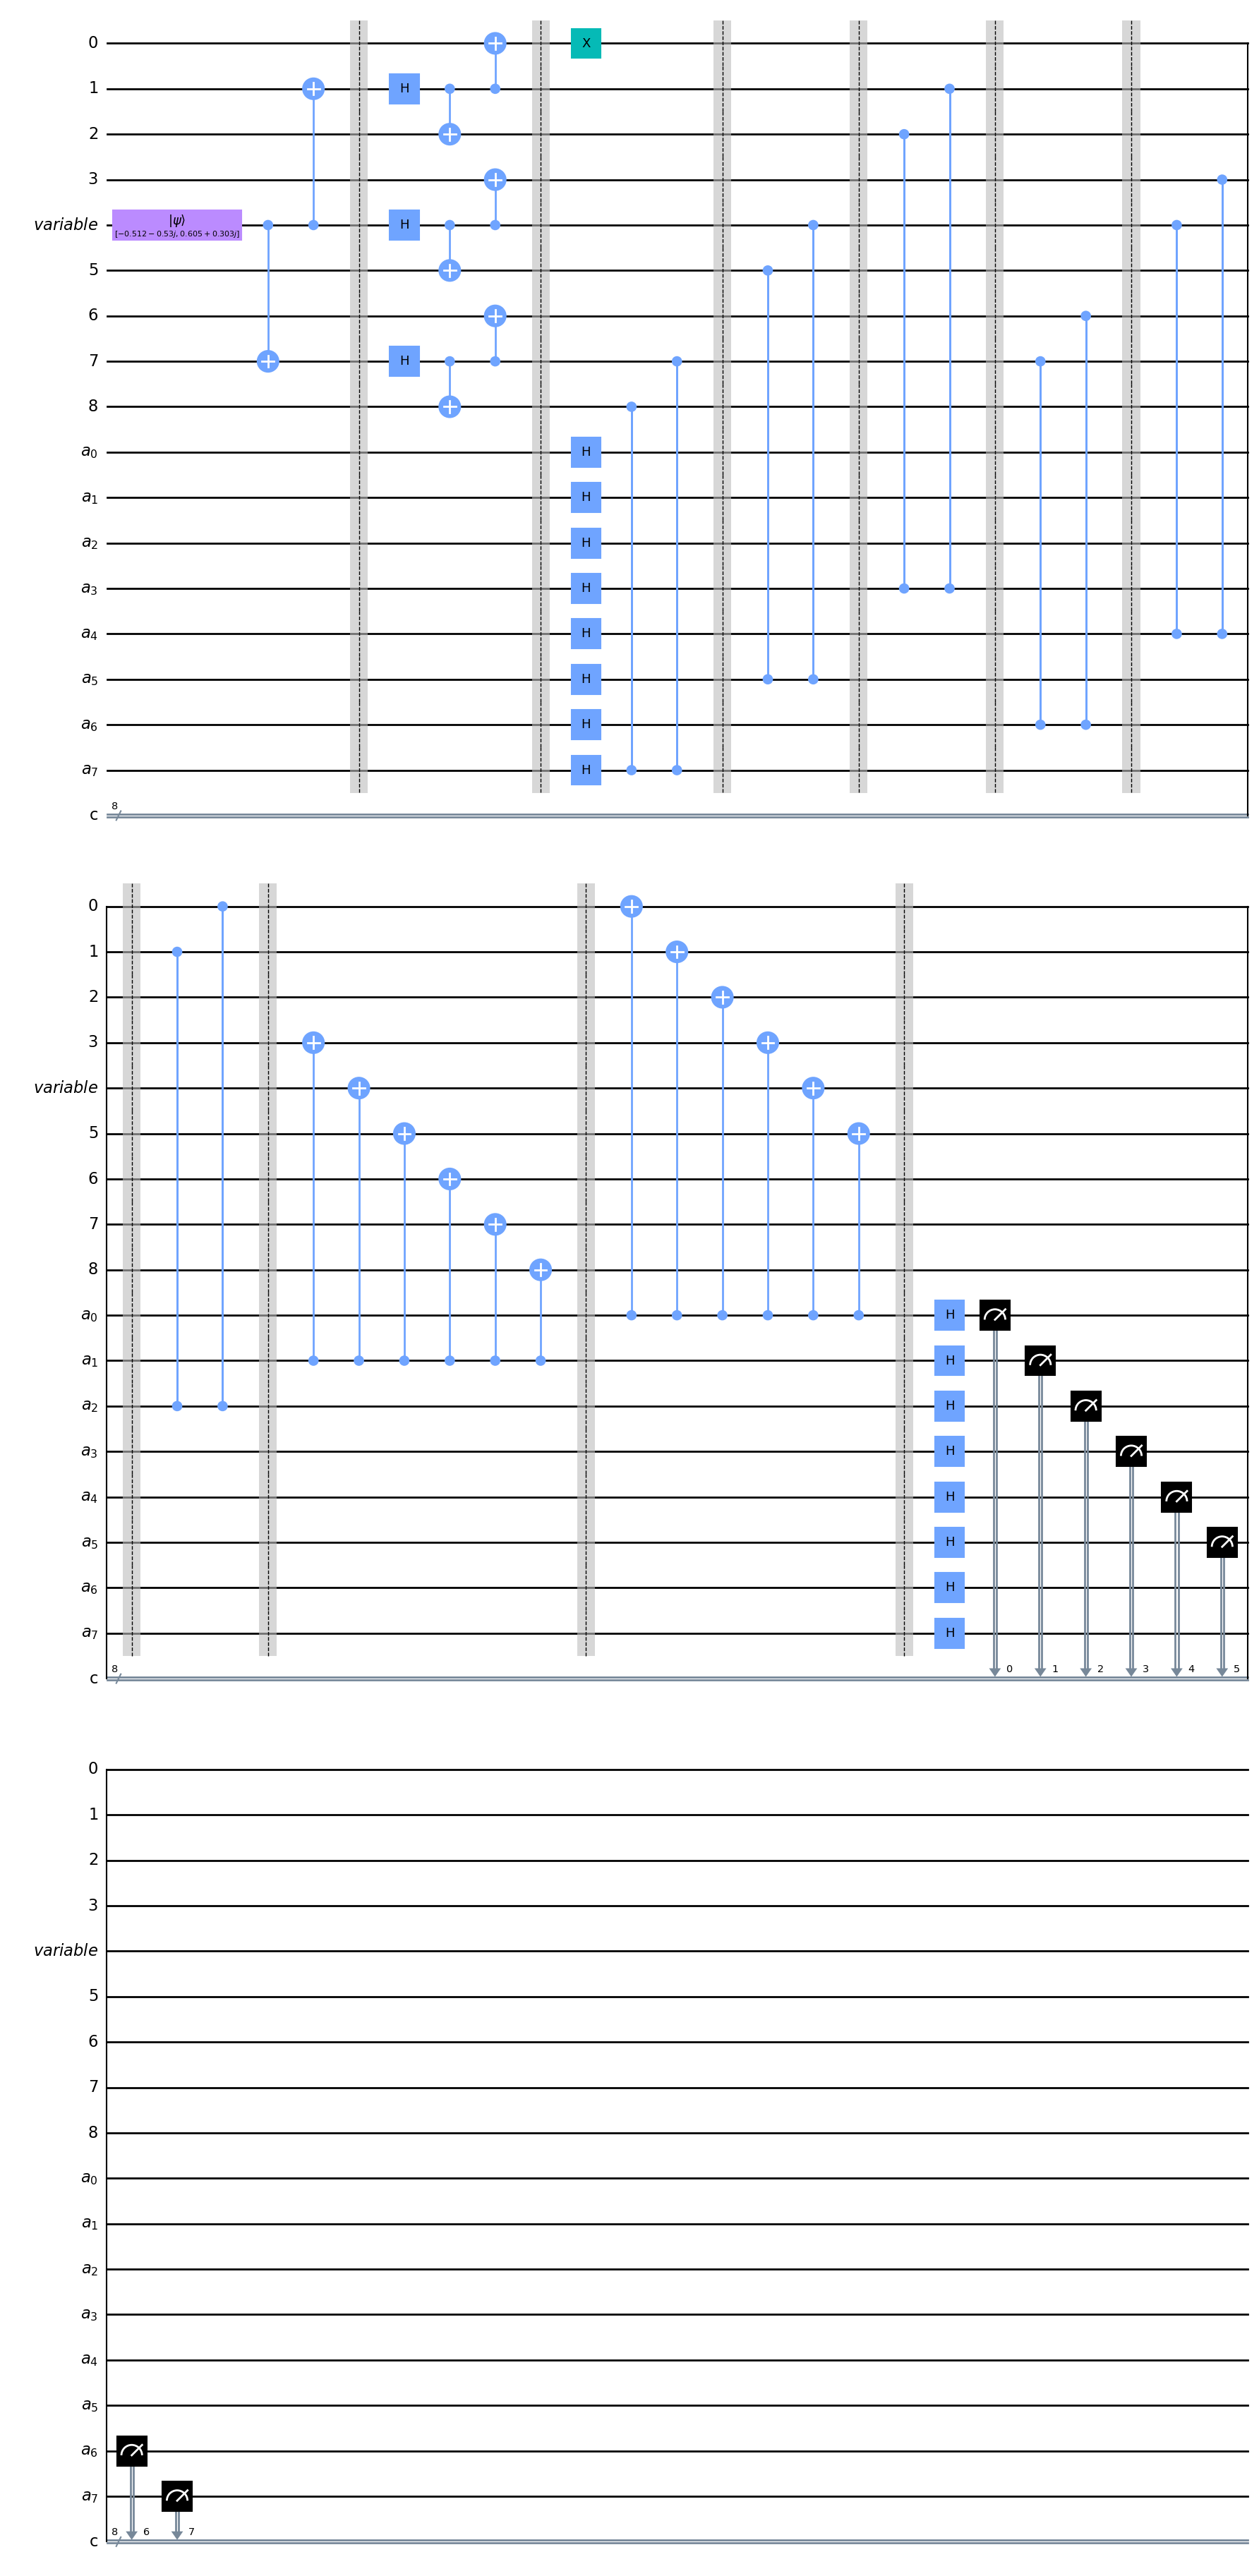

In [104]:
q_input = QuantumRegister(1, 'variable')
q = QuantumRegister(8, "q_")
a = QuantumRegister(8, "a")
c = ClassicalRegister(8, 'c')
circ = QuantumCircuit(q[:4], q_input, q[4:], a, c)

def barrier():
    circ.barrier(q[:4],q_input,q[4:],a)

circ.initialize(random_vector,4)

circ.cx(q_input[0], q[6])
circ.cx(q_input[0], q[1])
barrier()
circ.h(q[1])
circ.h(q_input[0])
circ.h(q[6])
circ.cx(q[1], q[2])
circ.cx(q_input[0], q[4])
circ.cx(q[6], q[7])
circ.cx(q[1], q[0])
circ.cx(q_input[0], q[3])
circ.cx(q[6], q[5])
barrier()

# Introduce an X error on qubit_0:
circ.x(q[0])

# Introduce an Z error on qubit_0:
#circ.z(q[0])

# Hadamard gates on Ancilla qubits
for x in a:
    circ.h(x)

circ.cz(q[7],a[7])
circ.cz(q[6],a[7])
barrier()
circ.cz(q[4],a[5])
circ.cz(q_input[0],a[5])
barrier()
circ.cz(q[2],a[3])
circ.cz(q[1],a[3])
barrier()
circ.cz(q[6],a[6])
circ.cz(q[5],a[6])
barrier()
circ.cz(q_input[0],a[4])
circ.cz(q[3],a[4])
barrier()
circ.cz(q[1],a[2])
circ.cz(q[0],a[2])
barrier()
for i in range(3,9):
    circ.cx(a[1], i)
barrier()
for i in range(0,6):
    circ.cx(a[0], i)
barrier()
for i in range(8) :
    circ.h(a[i])
    circ.measure(a[i],c[i])


circ.draw('mpl')

{'00000100': 1024}


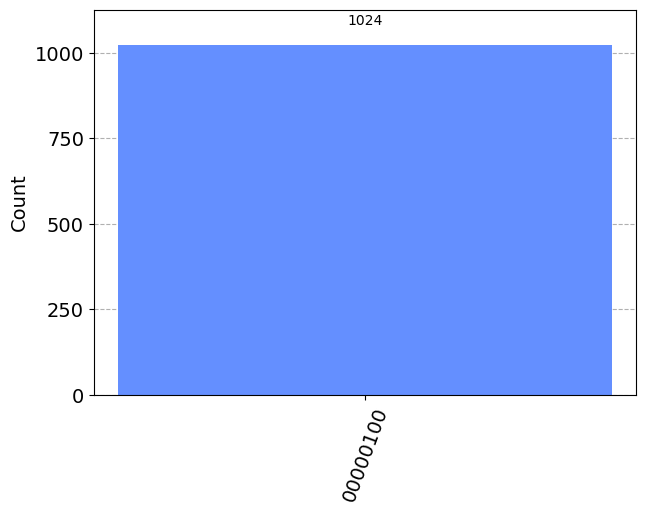

In [105]:
# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(circ, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)
plot_histogram(counts)